In [123]:
import pandas as pd
import matplotlib as plt
import seaborn as sns


In [124]:
with open('../data/clean/trulia.csv', 'r') as file:
    df = pd.read_csv(file)

In [179]:
df.head(10)

,Address,County,Zip,price,Listing Url,Borough
0,"2600 Netherland Ave Bronx, NY 10463",Bronx,10463,2245.0,https://www.trulia.com/c/ny/bronx/the-century-...,Bronx
1,"2600 Netherland Ave Bronx, NY 10463",Bronx,10463,2600.0,https://www.trulia.com/c/ny/bronx/the-century-...,Bronx
2,"2600 Netherland Ave Bronx, NY 10463",Bronx,10463,3675.0,https://www.trulia.com/c/ny/bronx/the-century-...,Bronx
3,"939 Woodycrest Ave Bronx, NY 10452",Bronx,10452,1581.0,https://www.trulia.com/c/ny/bronx/noonan-tower...,Bronx
4,"939 Woodycrest Ave Bronx, NY 10452",Bronx,10452,1904.0,https://www.trulia.com/c/ny/bronx/noonan-tower...,Bronx
5,"939 Woodycrest Ave Bronx, NY 10452",Bronx,10452,2053.0,https://www.trulia.com/c/ny/bronx/noonan-tower...,Bronx
6,"939 Woodycrest Ave Bronx, NY 10452",Bronx,10452,2399.0,https://www.trulia.com/c/ny/bronx/noonan-tower...,Bronx
7,"939 Woodycrest Ave Bronx, NY 10452",Bronx,10452,2524.0,https://www.trulia.com/c/ny/bronx/noonan-tower...,Bronx
8,"939 Woodycrest Ave Bronx, NY 10452",Bronx,10452,2699.0,https://www.trulia.com/c/ny/bronx/noonan-tower...,Bronx
9,"562 E 191st St Bronx, NY 10458",Bronx,10458,3000.0,https://www.trulia.com/c/ny/bronx/562-east-191...,Bronx


In [126]:
df.shape

(1026, 6)

/var/folders/ht/q4d_vppn3x5d3_p7bs499mdh0000gn/T/ipykernel_19042/3129168411.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_rent_by_boro = df.groupby(["Borough"]).mean()["price"]


<AxesSubplot: title={'center': 'Top 5 Zip Codes with the Highest Average Rental Amounts '}, xlabel='Zip', ylabel='Average Listed Rental Price'>

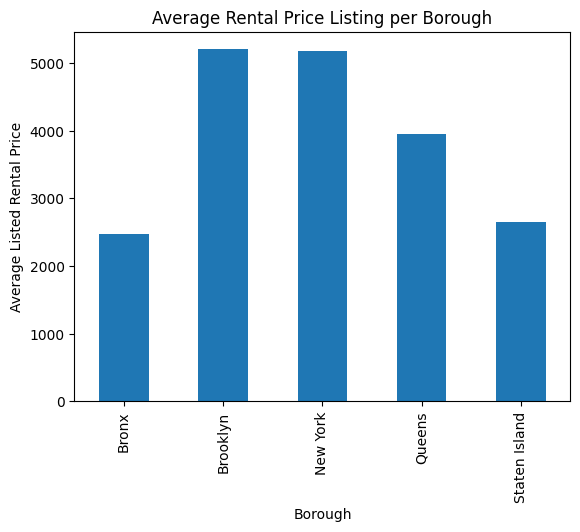

In [167]:
# Median rent amount per borough 

mean_rent_by_boro = df.groupby(["Borough"]).mean()["price"]
mean_rent_by_boro.plot(kind='bar', x = "Borough", ylabel = "Average Listed Rental Price", title = "Average Rental Price Listing per Borough")

plot

<AxesSubplot: title={'center': 'Valid Trulia Listings'}, xlabel='Borough', ylabel='Number of Valid Trulia Listings'>

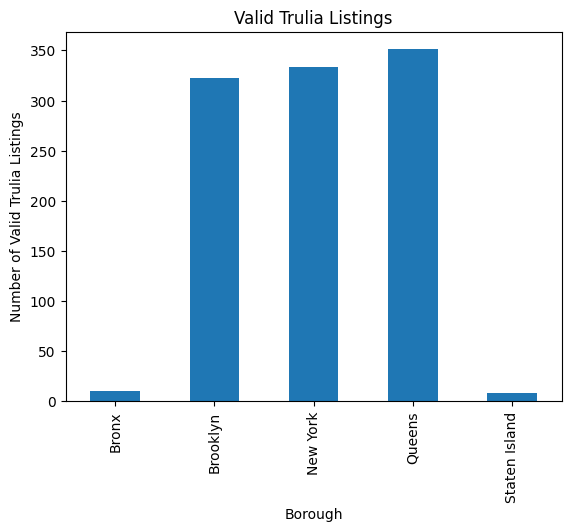

In [157]:
# Distrubtion of Listings per Borough

num_listings_by_boro = df.groupby(["Borough"]).count()["Listing Url"]
plot = num_listings_by_boro.plot(kind='bar', x = "Borough", ylabel = "Number of Valid Trulia Listings", title = "Valid Trulia Listings")

plot

<AxesSubplot: title={'center': '5 Zip Codes with the most Valid Trulia Listings'}, xlabel='Zip', ylabel='Number of Valid Trulia Listings'>

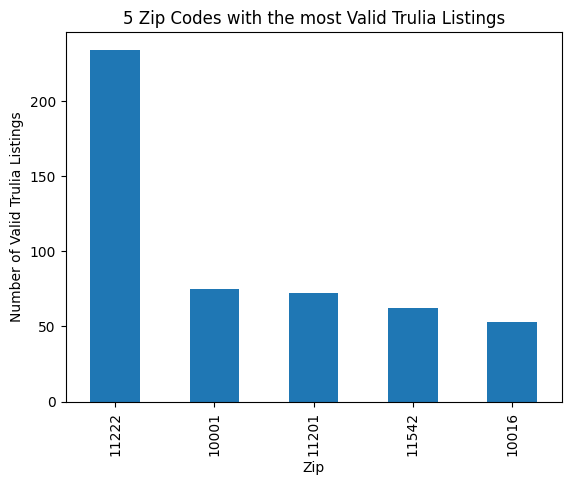

In [158]:
# Top 5 Zip Codes with the Most amount of listings
num_listings_by_zip = df.groupby(["Zip"]).count()["Listing Url"]
num_listings_by_zip = num_listings_by_zip.sort_values(ascending=False).head(5)

num_listings_by_zip.plot(kind='bar', x = "Zip Code", ylabel = "Number of Valid Trulia Listings", title = "5 Zip Codes with the most Valid Trulia Listings")


/var/folders/ht/q4d_vppn3x5d3_p7bs499mdh0000gn/T/ipykernel_19042/1965176001.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_rent_by_zip = df.groupby(["Zip"]).mean()["price"].sort_values(ascending=False).head(5)


<AxesSubplot: title={'center': 'Top 5 Zip Codes with the Highest Average Rental Amounts '}, xlabel='Zip', ylabel='Average Listed Rental Price'>

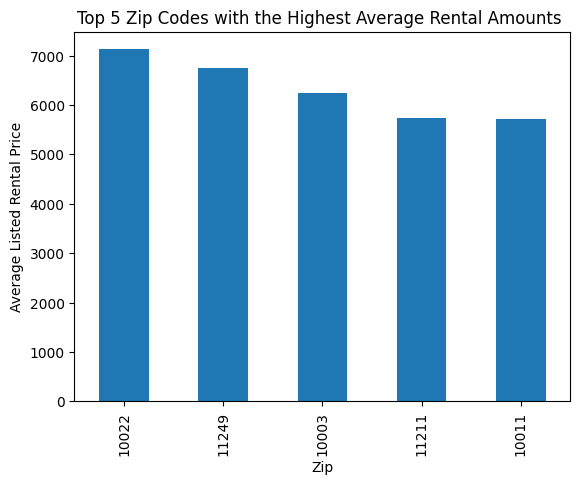

In [159]:
# Zip Codes with the highest average rental amounts 

median_rent_by_zip = df.groupby(["Zip"]).mean()["price"].sort_values(ascending=False).head(5)
plot = median_rent_by_zip.plot(kind='bar', x = "Borough", ylabel = "Average Listed Rental Price", 
                               title = "Top 5 Zip Codes with the Highest Average Rental Amounts ")

plot

In [170]:
## TODO: Explore the following :
    # Box plot for avg rent for each borough 
    # Try graphing different dataframes together (e.g.: Zillow data + Trulia, Apartments.com + Trulia, AirBnB vs Trulia)

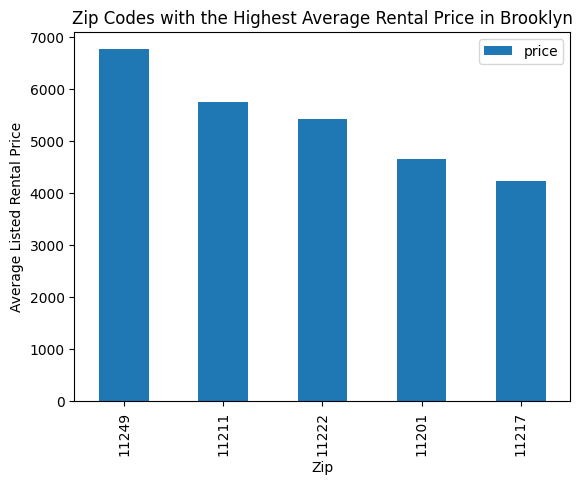

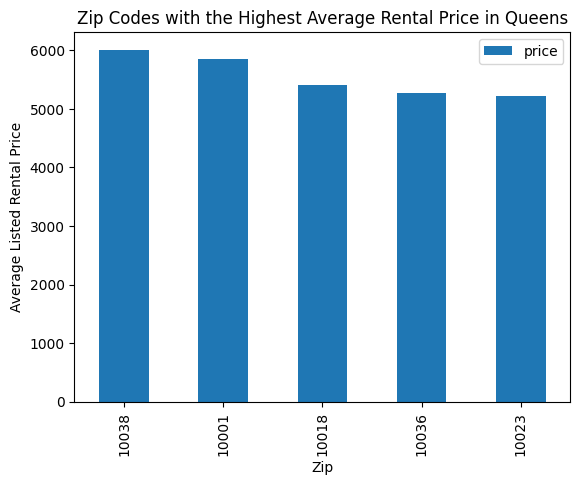

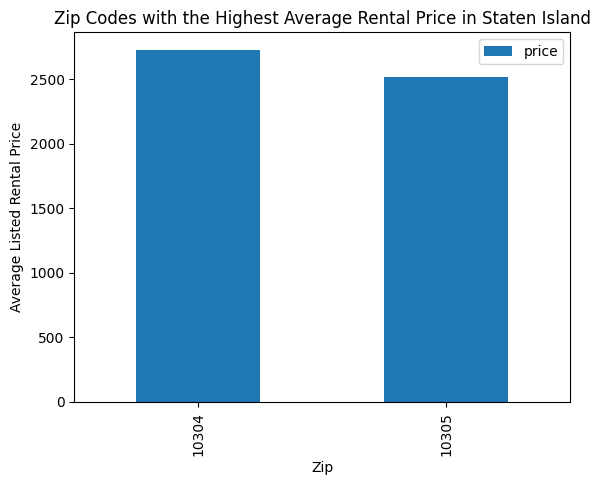

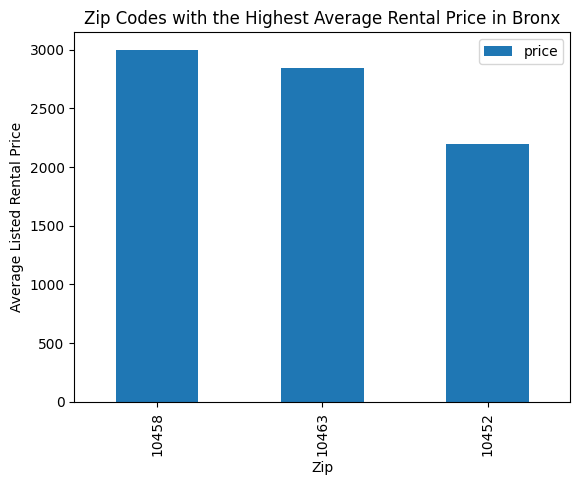

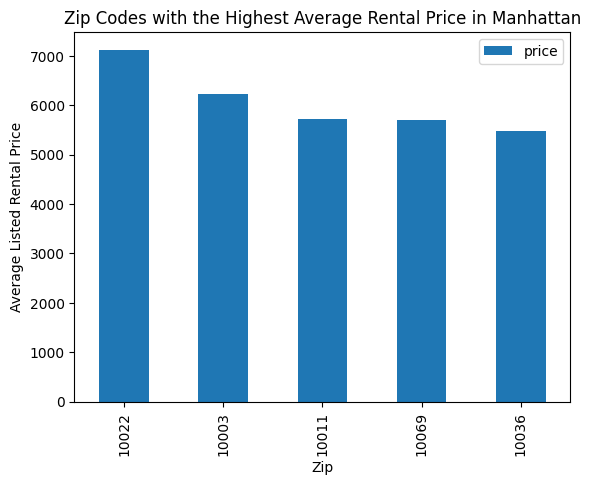

In [173]:
# Average rent price per zip code per borough

brooklyn = df.groupby(["Borough"]).get_group("Brooklyn").groupby(["Zip"]).mean(numeric_only = True).sort_values(by="price", ascending=False).head(5)
manhattan = df.groupby(["Borough"]).get_group("New York").groupby(["Zip"]).mean(numeric_only = True).sort_values(by="price", ascending=False).head(5)
queens = df.groupby(["Borough"]).get_group("Queens").groupby(["Zip"]).mean(numeric_only = True).sort_values(by="price", ascending=False).head(5)
staten_island = df.groupby(["Borough"]).get_group("Staten Island").groupby(["Zip"]).mean(numeric_only = True).sort_values(by="price", ascending=False).head(5)
bronx = df.groupby(["Borough"]).get_group("Bronx").groupby(["Zip"]).mean(numeric_only = True).sort_values(by="price", ascending=False).head(5)

boros = [(brooklyn, "Brooklyn"), (queens, "Queens"), (staten_island, "Staten Island"), (bronx, "Bronx"), (manhattan, "Manhattan")]

for b, b_title in boros: 
    b.plot(kind = "bar", title = "Zip Codes with the Highest Average Rental Price in "+ b_title, ylabel = "Average Listed Rental Price",)



<AxesSubplot: title={'center': 'Zip Codes with the Highest Number of Trulia Listings in Brooklyn'}, xlabel='Zip', ylabel='Number of Listings'>

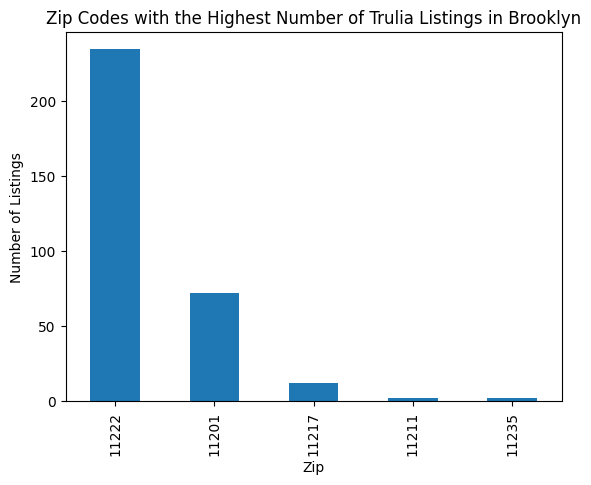

In [178]:
# Distribution of Trulia Listings per Borough per Zip code

brooklyn = df.groupby(["Borough"]).get_group("Brooklyn").groupby(["Zip"]).count().sort_values(by="Listing Url", ascending=False).head(5)
manhattan = df.groupby(["Borough"]).get_group("New York").groupby(["Zip"]).count().sort_values(by="Listing Url", ascending=False).head(5)
queens = df.groupby(["Borough"]).get_group("Queens").groupby(["Zip"]).count().sort_values(by="Listing Url", ascending=False).head(5)
staten_island = df.groupby(["Borough"]).get_group("Staten Island").groupby(["Zip"]).count().sort_values(by="Listing Url", ascending=False).head(5)
bronx = df.groupby(["Borough"]).get_group("Bronx").groupby(["Zip"]).count().sort_values(by="Listing Url", ascending=False).head(5)

brooklyn["Listing Url"].plot(kind = "bar", title = "Zip Codes with the Highest Number of Trulia Listings in Brooklyn", ylabel = "Number of Listings")
    

<AxesSubplot: title={'center': 'Manhattan'}, xlabel='Zip', ylabel='Number of Listings'>

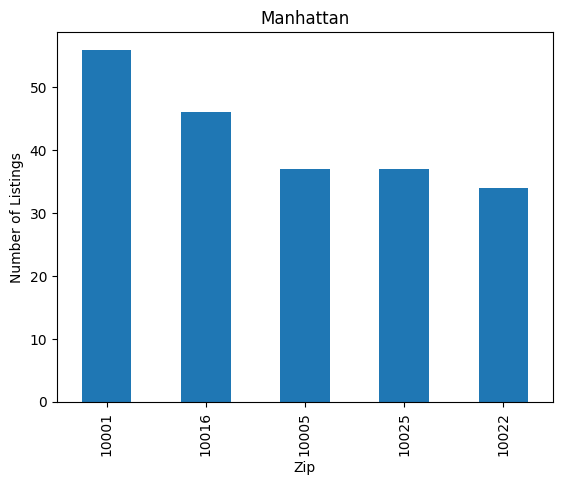

In [162]:
manhattan["Listing Url"].plot(kind = "bar", title = "Zip Codes with the Highest Number of Trulia Listings in Manhattan", ylabel = "Number of Listings")


<AxesSubplot: title={'center': 'Zip Codes with the Highest Number of Trulia Listings in Queens'}, xlabel='Zip', ylabel='Number of Listings'>

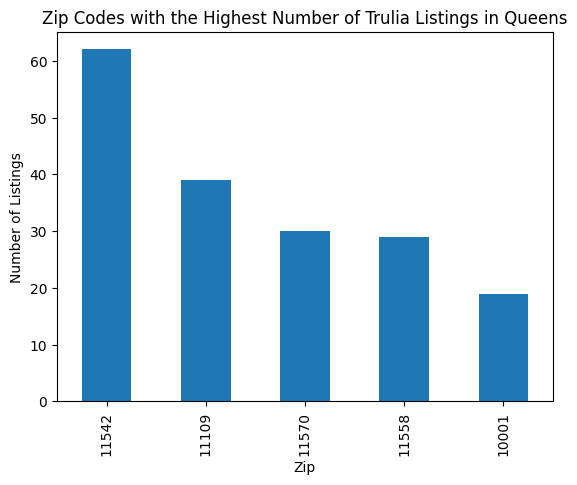

In [175]:
queens["Listing Url"].plot(kind = "bar", title = "Zip Codes with the Highest Number of Trulia Listings in Queens", ylabel = "Number of Listings")


<AxesSubplot: title={'center': 'Zip Codes with the Highest Number of Trulia Listings in Staten Island'}, xlabel='Zip', ylabel='Number of Listings'>

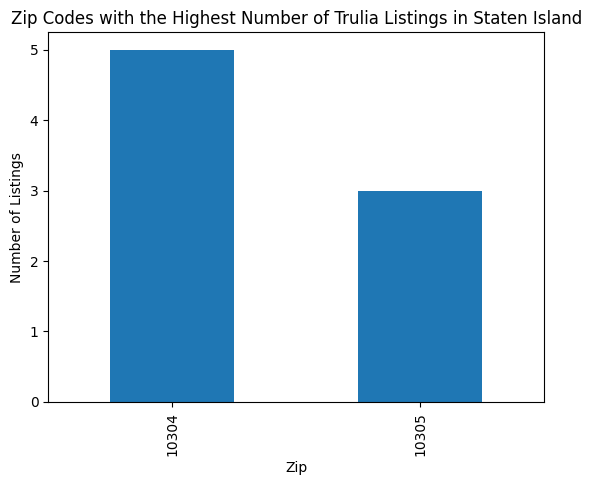

In [176]:
staten_island["Listing Url"].plot(kind = "bar", title = "Zip Codes with the Highest Number of Trulia Listings in Staten Island", ylabel = "Number of Listings")


<AxesSubplot: title={'center': 'Zip Codes with the Highest Number of Trulia Listings in the Bronx'}, xlabel='Zip', ylabel='Number of Listings'>

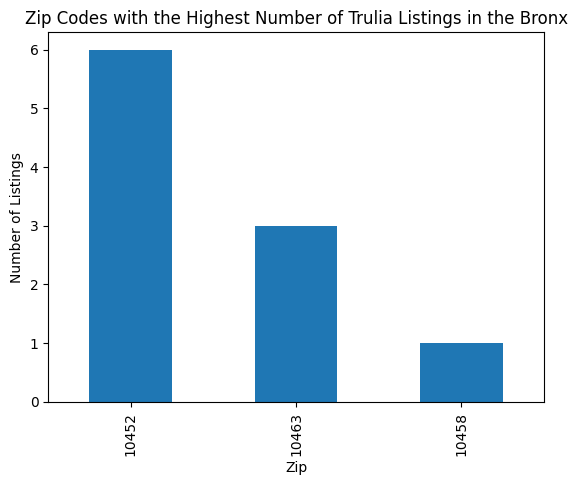

In [177]:
bronx["Listing Url"].plot(kind = "bar", title = "Zip Codes with the Highest Number of Trulia Listings in the Bronx", ylabel = "Number of Listings")

<AxesSubplot: xlabel='Borough', ylabel='price'>

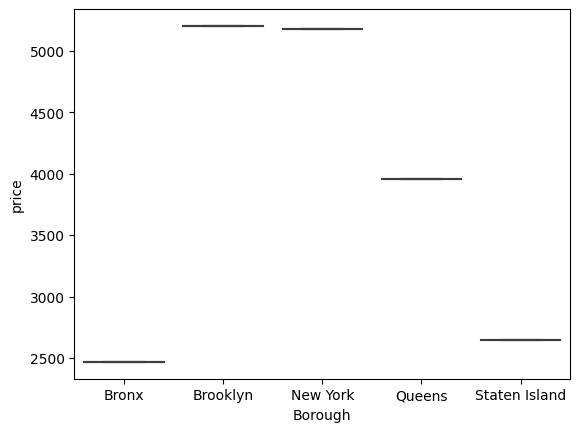

In [172]:
# HELP! This seems wrong...

sns.boxplot(data = mean_rent_by_boro.reset_index(), x="Borough", y="price")